# **The Dorion Auto Advertisement Campaign**

Problem Statement: Dorian Auto manufactures luxury cars and trucks. The company believes that its most likely customers are high-income women and men. To reach these groups, Dorian Auto has embarked on an ambitious TV advertising campaign and has decided to purchase 1-minute commercial spots on two types of programs: comedy shows and football games. Each comedy commercial is seen by 7 million high-income women and 2 million high-income men. Each football commercial is seen by 2 million high-income women and 12 million high-income men. A 1-minute comedy add costs $50000,and a 1-minute football add costs $100000. Dorian
would like the commercial to be seen by at least 28 million high-income women and 24 million high-income men. Determine how Dorian Auto can meet its advertising requirement at minimum cost.

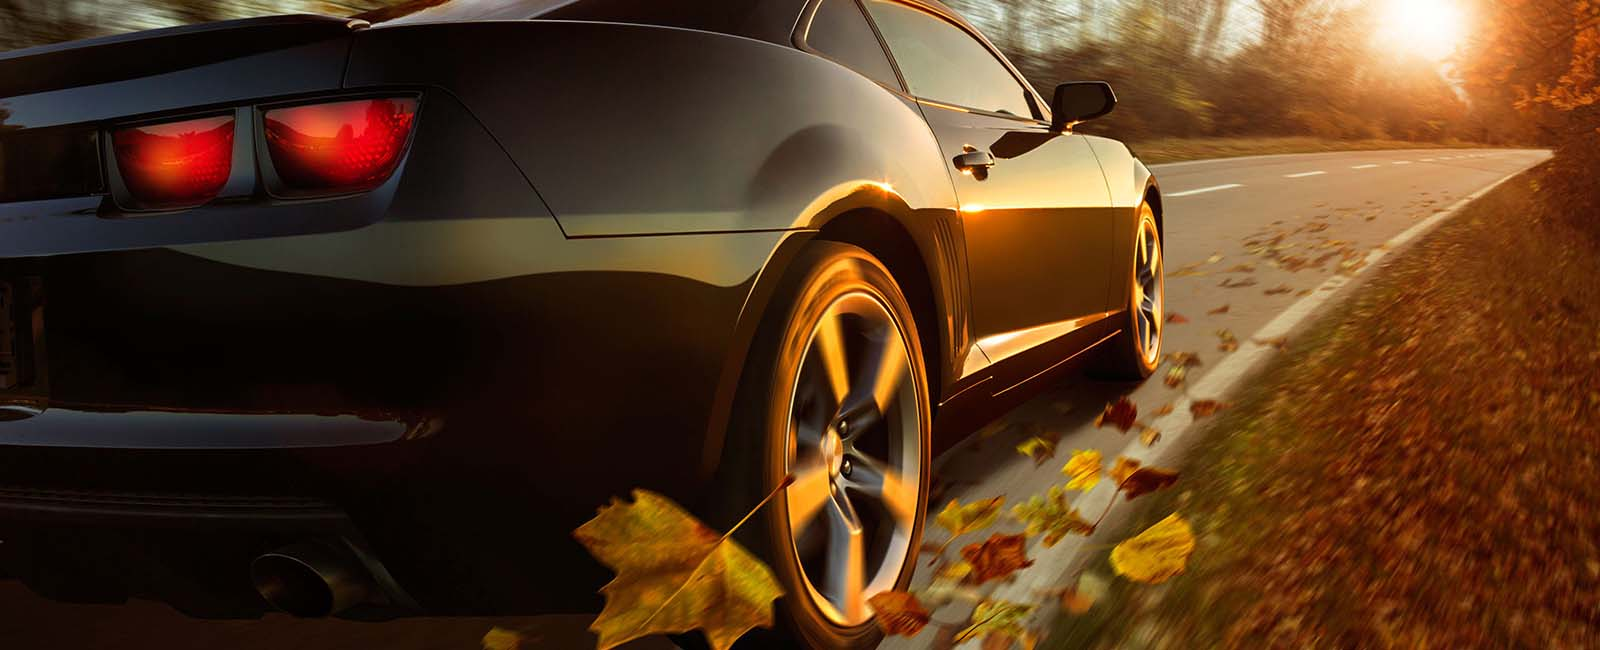


In [20]:
!pip install pyomo
!apt-get install -y -qq glpk-utils
import pyomo.environ as pyomo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up libsuitesparse

In [22]:
#First step is to define the Model
model=pyomo.ConcreteModel();

#Next step is define the variables
model.x1=pyomo.Var();  #Numbers of comedy ads purchased
model.x2=pyomo.Var();  #Numbers of football ads purchased

#Now lets define the objective function
model.obj=pyomo.Objective(expr = 50*model.x1 + 100*model.x2, sense=pyomo.minimize);

#Now lets define the constraint 
def rule1(model):
    return 7*model.x1+2*model.x2>=28
model.eq1=pyomo.Constraint(rule=rule1, doc='Constraint 1');

def rule2(model):
    return 2*model.x1+12*model.x2>=24
model.eq2=pyomo.Constraint(rule=rule2, doc='Constraint 2');

#Now lets solve the problem

results=pyomo.SolverFactory('glpk',executable='/usr/bin/glpsol').solve(model);


results.write()

print("\n RESULTS \n");
print("Total Cost of Advertisement Campaign is =",model.obj());
print("Number of comedy ads purchased",model.x1());
print("Number of football ads purchased",model.x2());







# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 320.0
  Upper bound: 320.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Number of nonzeros: 5
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.010708332061767578
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------